# Business Objective
This model projects the demand growth of plant based burgers in order to understand when we need to start a new production line. This model helps us understand when a shortage would occur so we can plan to avoid one. 

# Approach
Demand forecasting model based on historic trends
<br>
Any range forecasted assumes a uniform distribution
<br>


# Methodology
Tools: Jupyter Notebook (Python).
Matplotlib FiveThirtyEight visualization package

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

## Calculate PBF Demand

### Demand forecasting model
<b>Parameters</b>
* weeks --> timeframe of forecast (also forecast per week, not month)
* restaurants --> baseline number of restaurants (allows tweaking of forecast)
* avg_purchase --> average purchase per restaurant
* percentile --> percent in decimal
* df --> dataframe to load data for graphing, etc

In [5]:

def demand(weeks, restaurants, avg_purchase, percentile, df):

    current_storage = 1000000
    
    for week in range(weeks):
                
        # Calculate weekly quantities
        weekly_lbs = restaurants * avg_purchase
        weekly_supply = (1000000 + (500000 * percentile))

        # Either add to, or draw from freezer reserves
        if (weekly_supply - weekly_lbs) < 0:
            current_storage -= (weekly_lbs - weekly_supply)
        elif ((weekly_supply - weekly_lbs) + current_storage) > 3000000:
            current_storage = 3000000
        else:
            current_storage += (weekly_supply - weekly_lbs) 
            
        remaining_after_week = (weekly_supply + current_storage) - weekly_lbs

#        # Print status for debugging/sensecheck
#         print('Week ' + str(week+1) + ' Demand: ' + str(round(weekly_lbs,2)))
#         print('Week ' + str(week+1) + ' Remaining: ' + str(round(remaining_after_week,0)))
#         print('Current freezer storage: ' + str(current_storage))
#         print('Restaurants served: ' + str(round(restaurants, 1)))
#         print('Average weekly purchase (lbs) : ' + str(round(avg_purchase,1)))
#         print('\n')
        
        # Update dataframe
        df.at[week,'Week'] = str(round(week+1,0))
        df.at[week,'Total Demand'] = round(weekly_lbs,0)
        df.at[week,'Restaurants'] = round(restaurants,0)
        df.at[week,'Avg Purchase'] = round(avg_purchase,1)
        df.at[week, 'Storage'] = round(current_storage, 0)
        
        # Update baseline quantities
        restaurants -= (restaurants * ((.00125 * percentile) + .00125)) # weekly restaurant loss (calculated first to remove existing)
        restaurants += ((200 * percentile) + 50) # weekly restaurant footprint growth
        avg_purchase += (avg_purchase * (.025 * percentile))
        
        
    return df

## Creating dataframes for each percentile scenario
* Looking at 10th, 50th, 90th and 99th percentile growth scenarios
* In order to avoid adding names dynamically to a Python namespace 


In [3]:
demand_data = np.array([[1,2,3,4,5]])

In [7]:
tenth_percentile = pd.DataFrame(data=demand_data,columns=['Week', 'Total Demand', 'Restaurants', 'Avg Purchase', 'Storage'])
demand(weeks=78, restaurants=10000, avg_purchase=50, percentile=.1, df=tenth_percentile)
/

()

In [8]:
print('Tenth Percentile')
tenth_percentile.iloc[25]

Tenth Percentile


Week                26
Total Demand    605825
Restaurants      11383
Avg Purchase      53.2
Storage          3e+06
Name: 25, dtype: object

In [9]:
# Fiftieth Percentile
fiftieth_percentile = pd.DataFrame(data=demand_data,columns=['Week', 'Total Demand', 'Restaurants', 'Avg Purchase', 'Storage'])
demand(weeks=78, restaurants=10000, avg_purchase=50, percentile=.5, df=fiftieth_percentile)
fiftieth_percentile.iloc[25]

Week                26
Total Demand    900945
Restaurants      13208
Avg Purchase      68.2
Storage          3e+06
Name: 25, dtype: object

In [12]:
# Ninetieth Percentile
ninetieth_percentile = pd.DataFrame(data=demand_data,columns=['Week', 'Total Demand', 'Restaurants', 'Avg Purchase', 'Storage'])
demand(weeks=78, restaurants=10000, avg_purchase=50, percentile=.9, df=ninetieth_percentile)
ninetieth_percentile.iloc[25]['Total Demand']

1309151.0

In [21]:
# 99 Percentile
nine_nine_percentile = pd.DataFrame(data=demand_data,columns=['Week', 'Total Demand', 'Restaurants', 'Avg Purchase', 'Storage'])
demand(weeks=78, restaurants=10000, avg_purchase=50, percentile=.99, df=nine_nine_percentile)
# nine_nine_percentile.iloc[25]['Storage']
nine_nine_percentile.head(5)

,Week,Total Demand,Restaurants,Avg Purchase,Storage
0,1,500000.0,10000.0,50.0,1995000.0
1,2,523807.0,10223.0,51.2,2966193.0
2,3,548458.0,10446.0,52.5,3000000.0
3,4,573978.0,10668.0,53.8,3000000.0
4,5,600394.0,10889.0,55.1,3000000.0


### Print out detailed reports for reference

In [27]:
tenth_percentile.to_csv('10th_percentile_demand.csv')
fiftieth_percentile.to_csv('50th_percentile_demand.csv')
ninetieth_percentile.to_csv('90th_percentile_demand.csv')
nine_nine_percentile.to_csv('99th_percentile_demand.csv')

## Graph the demand and time until shortage with BAU

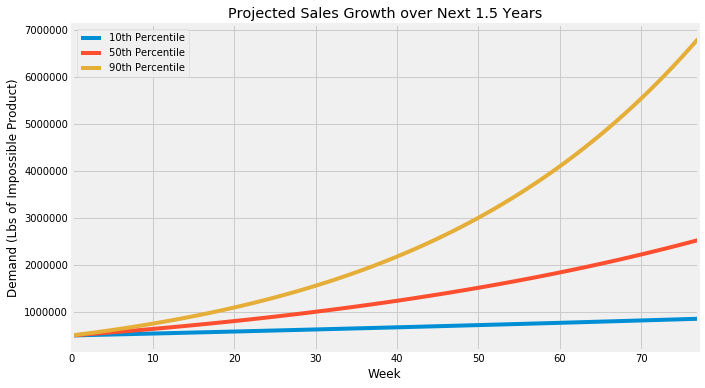

In [20]:
tenth_percentile['Total Demand'].plot(figsize=(10, 6), label="10th Percentile")
fiftieth_percentile['Total Demand'].plot(figsize=(10, 6), label="50th Percentile")
ninetieth_percentile['Total Demand'].plot(figsize=(10, 6), label="90th Percentile")
plt.title('Projected Sales Growth over Next 1.5 Years')
plt.ylabel('Demand (Lbs of Product)')
plt.legend()
plt.xlabel('Week')

plt.show()

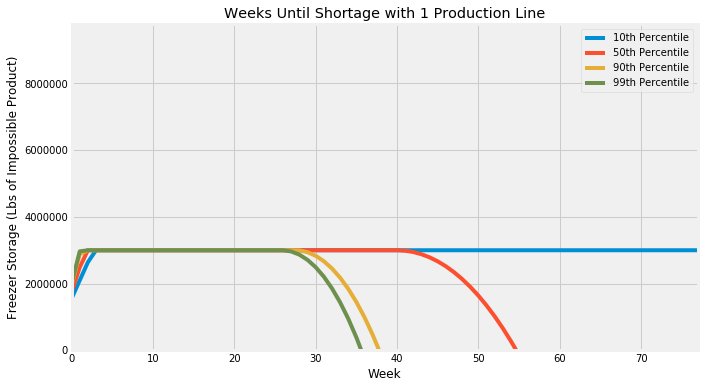

In [24]:
# Time until storage runs out
tenth_percentile['Storage'].plot(figsize=(10, 6), label="10th Percentile")
fiftieth_percentile['Storage'].plot(figsize=(10, 6), label="50th Percentile")
ninetieth_percentile['Storage'].plot(figsize=(10, 6), label="90th Percentile")
nine_nine_percentile['Storage'].plot(figsize=(10, 6), label="99th Percentile")
plt.title('Weeks Until Shortage with 1 Production Line')
plt.ylabel('Freezer Storage (Lbs of Product)')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('Week')

plt.show()

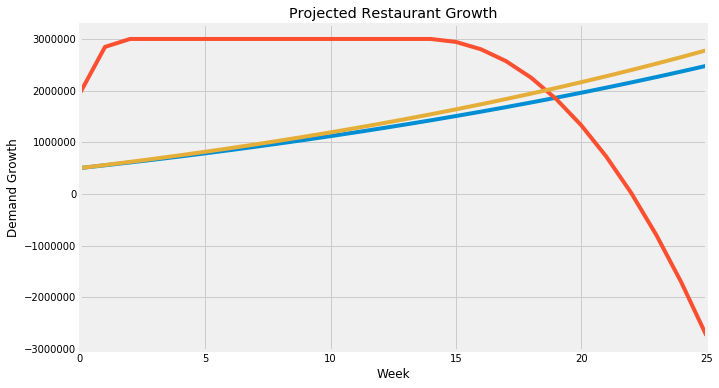

In [99]:
# Experimenting with graphing both together

demand_df['Total Demand'].plot(figsize=(10, 6))
demand_df['Storage'].plot()
plt.title('Projected Restaurant Growth')
plt.ylabel('Demand Growth')
plt.xlabel('Week')

high_demand['Total Demand'].plot(figsize=(10, 6))
plt.show()

### Notes, testing out things, mistakes

In [218]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [230]:
test_mu, test_sigma = 0.0125, 0.0075
test_s = np.random.normal(test_mu, test_sigma, 1000)

In [232]:
value = test_mu + (1.282 * test_sigma)
print(value)

0.022115000000000003


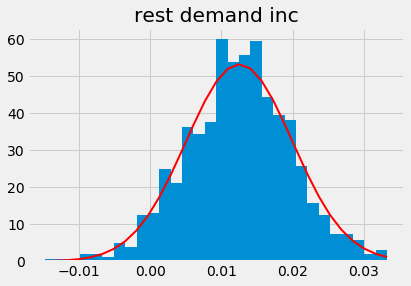

In [231]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(test_s, 30, density=True)
plt.plot(bins, 1/(test_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - test_mu)**2 / (2 * test_sigma**2) ), linewidth=2, color='r')
plt.title('rest demand inc')
plt.show()

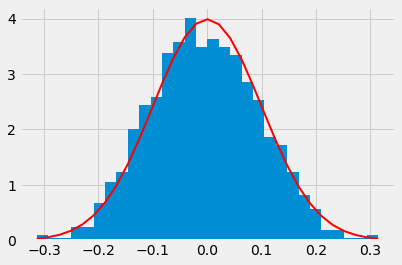

In [219]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()